In [1]:
#run: pip install openquantumcomputing
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut

In [2]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
from qiskit.visualization import *

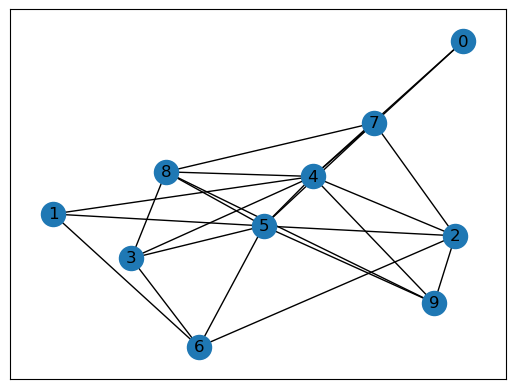

In [3]:
numV=10
G = nx.read_gml("../../data/sample_graphs/w_ba_n"+str(numV)+"_k4_0.gml")
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)
mincost=-8.657714089848158

set up optimizers so that they have roughly the same number of function evaluations

In [4]:
optimizers={}
plotstyle={}

In [5]:
from qiskit_algorithms.optimizers import SPSA, QNSPSA, COBYLA, NELDER_MEAD

settings = {
    "maxiter": 70,
    "blocking": True,
    "allowed_increase": 0,
    "second_order": True,
    "regularization": 0.01
}
optimizers["spsa"] = [SPSA, settings.copy()]
plotstyle["spsa"] = '+-'

settings = {
    "maxiter": 50,
    "blocking": True,
    "allowed_increase": 0,
    "learning_rate": 0.02,
    "perturbation": 0.05,
    "regularization": 0.01,
    "hessian_delay": 0
}
optimizers["qnspsa"] = [QNSPSA, settings.copy()]
plotstyle["qnspsa"] = 'o-'

settings = {
    "maxiter": 110,
    "tol": 1e-6 
}
optimizers["neldermead"] = [NELDER_MEAD, settings.copy()]
plotstyle["neldermead"] = 'x-'

settings = {
    "maxiter": 350,
    "tol": 1e-6 
}
optimizers["cobyla"] = [COBYLA, settings.copy()]
plotstyle["cobyla"] = '*-'

In [6]:
qaoa={}
for key in optimizers:
    qaoa[key]=QAOAMaxCut(params={'G' : G, 'optimizer' : optimizers[key]})

In [7]:
for key in optimizers:
    qaoa[key].sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})

Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done
Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done
Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done
Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done


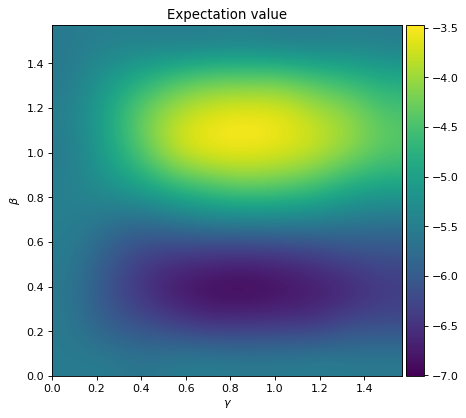

In [8]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoa["cobyla"].E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

In [9]:
maxdepth=10
for i in range(maxdepth):
    for key in optimizers:
        qaoa[key].increase_depth()

cost(depth= 1 )= -6.927910043501388
cost(depth= 1 )= -6.9174477271748716
cost(depth= 1 )= -7.021253729878198
cost(depth= 1 )= -6.8742157370885
cost(depth= 2 )= -7.402594431974419
cost(depth= 2 )= -7.476097057751611
cost(depth= 2 )= -7.497841178375399
cost(depth= 2 )= -7.442152765412646
cost(depth= 3 )= -7.808307432029209
cost(depth= 3 )= -7.671007997898861
cost(depth= 3 )= -7.7242136386664
cost(depth= 3 )= -7.752831864992368
cost(depth= 4 )= -7.959783036898415
cost(depth= 4 )= -7.8612947991505715
cost(depth= 4 )= -7.834613892747666
cost(depth= 4 )= -7.897444057950619
cost(depth= 5 )= -8.099464844729063
cost(depth= 5 )= -8.00954484654466
cost(depth= 5 )= -7.988588287115011
cost(depth= 5 )= -8.073556297441382
cost(depth= 6 )= -8.199685617695694
cost(depth= 6 )= -8.154802165453955
cost(depth= 6 )= -8.0475178711278
cost(depth= 6 )= -8.169165586659357
cost(depth= 7 )= -8.200341268570526
cost(depth= 7 )= -8.215722589209197
cost(depth= 7 )= -8.043119902346062
cost(depth= 7 )= -8.2141552308724

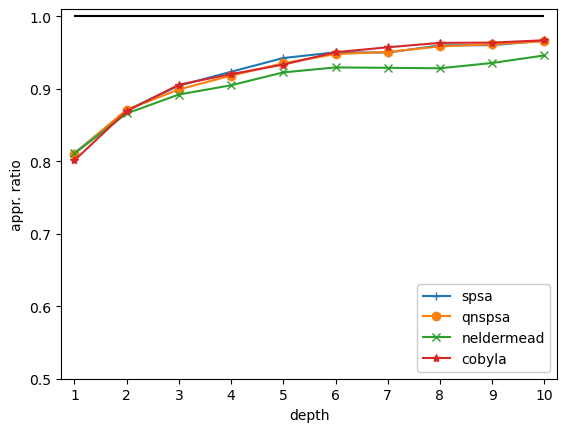

In [11]:
ax = pl.figure().gca()
pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
for key in optimizers:
    pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoa[key].costval.values()))/mincost, plotstyle[key], label=key)
pl.ylim(0.5,1.01)
pl.xlim(1-.25,maxdepth+.25)
_=pl.ylabel('appr. ratio')
_=pl.xlabel('depth')
_=pl.legend(loc="lower right", framealpha=1)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

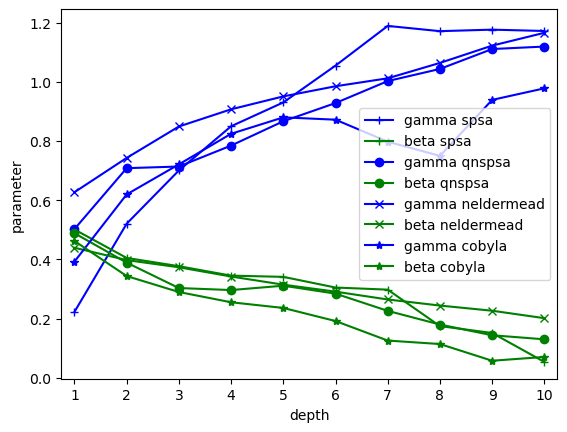

In [12]:
ax = pl.figure().gca()
for key in optimizers:
    pl.plot(np.arange(1,maxdepth+1),qaoa[key].angles_hist['d'+str(maxdepth)+'_final'][::2],"b"+plotstyle[key],label='gamma '+key)
    pl.plot(np.arange(1,maxdepth+1),qaoa[key].angles_hist['d'+str(maxdepth)+'_final'][1::2],"g"+plotstyle[key],label='beta '+key)
pl.xlim(1-.25,maxdepth+.25)
_=pl.ylabel('parameter')
_=pl.xlabel('depth')
_=pl.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

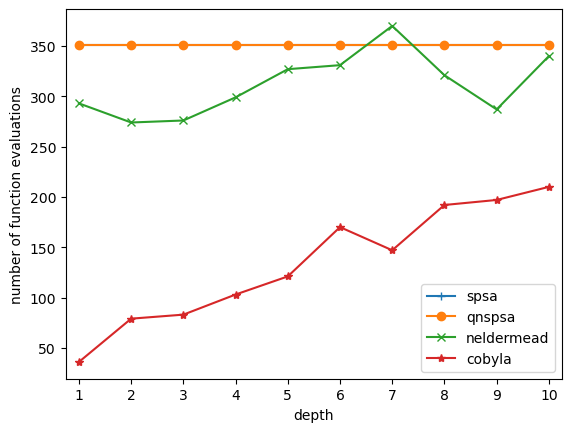

In [13]:
ax = pl.figure().gca()
for key in optimizers:
    _=pl.plot(np.arange(1,maxdepth+1),qaoa[key].num_fval.values(), plotstyle[key], label=key)
pl.xlim(1-.25,maxdepth+.25)
_=pl.ylabel('number of function evaluations')
_=pl.xlabel('depth')
_=pl.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))